<div style="
    background: linear-gradient(145deg, #0b0f16, #111827);
    padding: 32px;
    border-radius: 18px;
    border: 1.5px solid #00c8d6;
    box-shadow: 0 0 22px rgba(0, 200, 214, 0.25);
    text-align: center;
    color: #e5f4f7;
    font-family: 'Segoe UI', sans-serif;
">


<h2 style="
     color: #5be7f0;
    font-size: 36px;
    font-weight: 700;
    margin-bottom: 12px;
    text-shadow: 0 0 10px rgba(91, 231, 240, 0.35);
">
    Crypto Price Direction Prediction
</h2>

<p style="font-size:15px; line-height:1.7; opacity:0.95;">
    This notebook analyzes cryptocurrency market data and applies
    <strong>machine learning</strong> to predict
    <strong>short-term price direction (up or down)</strong>.
    Instead of forecasting exact prices, the task is framed as a
    <strong>binary classification problem</strong> to better handle
    the extreme volatility of crypto markets.
</p>

<hr style="
    margin:22px auto;
    width:60%;
    height:1px;
    border:none;
    background:linear-gradient(90deg,transparent,#00c8d6,transparent);
">

<h3 style="color:#7dd3fc;">📊 Exploratory Data Analysis</h3>
<p style="opacity:0.9;">
    EDA reveals highly skewed distributions in market capitalization
    and trading volume, where a small number of assets dominate the market.
    Correlation analysis highlights the most influential numerical features.
</p>

<hr style="
    margin:22px auto;
    width:60%;
    height:1px;
    border:none;
    background:linear-gradient(90deg,transparent,#00c8d6,transparent);
">

<h3 style="color:#5eead4;">🤖 Model Overview</h3>
<p style="opacity:0.9;">
    A <strong>Random Forest Classifier</strong> is trained using numerical
    market indicators such as price changes, volume metrics, and supply data.
    The model is robust to noise and effective at capturing non-linear patterns.
</p>

<!-- Performance Card -->
<div style="
    margin:26px auto;
    padding:18px;
    width:85%;
    border-radius:14px;
    background:rgba(0,200,214,0.08);
    border:1px solid rgba(0,200,214,0.4);
    box-shadow:0 0 18px rgba(0,200,214,0.35);
">
    <h3 style="margin-top:0;color:#00eaff;">📈 Performance Snapshot</h3>
    <p style="font-size:20px;margin:8px 0;">
        Accuracy: <strong style="color:#00eaff;">67%</strong>
    </p>
    <p style="font-size:14px;opacity:0.9;">
        The model performs strongly when identifying downward price movements,
        while upward movements remain harder to predict a realistic
        reflection of speculative crypto markets.
    </p>
</div>

<h3 style="color:#38bdf8;">🧠 Key Insights</h3>
<ul style="text-align:left; max-width:80%; margin:0 auto; line-height:1.7;">
    <li>Cryptocurrency markets are highly volatile and noisy.</li>
    <li>Market capitalization and liquidity strongly influence price direction.</li>
    <li>Classification provides more stable insights than regression.</li>
</ul>

<hr style="
    margin:22px auto;
    width:60%;
    height:1px;
    border:none;
    background:linear-gradient(90deg,transparent,#00c8d6,transparent);
">

<h3 style="color:#22d3ee;">✅ Final Takeaway</h3>
<p style="opacity:0.95;">
    While perfect prediction is unrealistic, this notebook demonstrates how
    machine learning can extract meaningful directional signals from noisy
    crypto market data. The Random Forest model serves as a strong baseline
    for future experimentation with advanced techniques.
</p>


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/kaggle/input/cryptocurrency-market-data/Coingecko_Crypto_Market_Data.csv")

df.head()

,coin_id,symbol,current_price_usd,market_cap_usd,total_volume_24h,price_change_24h_pct,price_change_7d_pct,circulating_supply,all_time_high,market_cap_rank
0,bitcoin,btc,87568.000000,1.748010e+12,5.110877e+10,-0.32237,-2.429944,1.996884e+07,126080.00,1
1,ethereum,eth,2934.230000,3.540300e+11,2.767470e+10,-0.40294,-3.912670,1.206949e+08,4946.05,2
2,tether,usdt,0.999075,1.866440e+11,8.447155e+10,-0.03362,-0.056425,1.868270e+11,1.32,3
3,binancecoin,bnb,853.260000,1.174640e+11,1.689838e+09,-1.21343,-1.549803,1.377347e+08,1369.99,4
4,ripple,xrp,1.860000,1.127230e+11,2.137827e+09,-0.37165,-3.825497,6.057294e+10,3.65,5


In [3]:
print("Shape:", df.shape)

Shape: (1500, 10)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   coin_id               1500 non-null   object 
 1   symbol                1500 non-null   object 
 2   current_price_usd     1500 non-null   float64
 3   market_cap_usd        1500 non-null   float64
 4   total_volume_24h      1500 non-null   float64
 5   price_change_24h_pct  1473 non-null   float64
 6   price_change_7d_pct   1494 non-null   float64
 7   circulating_supply    1500 non-null   float64
 8   all_time_high         1500 non-null   float64
 9   market_cap_rank       1500 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 117.3+ KB


In [5]:
df.describe()

,current_price_usd,market_cap_usd,total_volume_24h,price_change_24h_pct,price_change_7d_pct,circulating_supply,all_time_high,market_cap_rank
count,1.500000e+03,1.500000e+03,1.500000e+03,1473.000000,1494.000000,1.500000e+03,1.500000e+03,1500.000000
mean,1.079358e+04,2.134158e+09,1.424321e+08,-0.685305,13.246331,1.260551e+14,2.825815e+05,750.500000
std,3.240788e+05,4.656378e+10,2.670066e+09,8.811298,512.632767,4.544929e+15,7.365154e+06,433.157015
min,6.240000e-10,1.110262e+07,0.000000e+00,-33.790620,-86.572336,1.000000e+00,6.500000e-09,1.000000
25%,3.013346e-02,2.003664e+07,1.011245e+05,-2.431250,-3.800158,2.482197e+07,3.883260e-01,375.750000
50%,2.539220e-01,3.922620e+07,1.709602e+06,-0.706570,-0.845756,2.488404e+08,1.340000e+00,750.500000
75%,1.212500e+00,1.199474e+08,8.475564e+06,0.000000,1.346230,1.263389e+09,1.763000e+01,1125.250000
max,1.254266e+07,1.748010e+12,8.447155e+10,270.099580,19805.866560,1.760000e+17,2.130622e+08,1500.000000


In [6]:
df["price_up_7d"] = (df["price_change_7d_pct"] > 0).astype(int)

df["price_up_7d"].value_counts()

price_up_7d
0    953
1    547
Name: count, dtype: int64

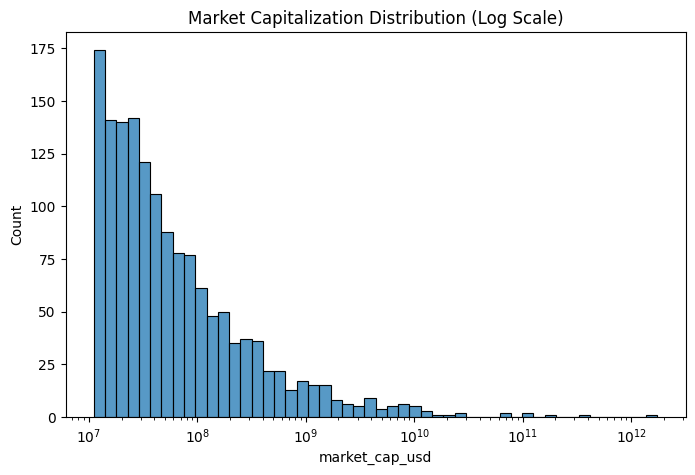

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["market_cap_usd"], bins=50, log_scale=True)
plt.title("Market Capitalization Distribution (Log Scale)")
plt.show()

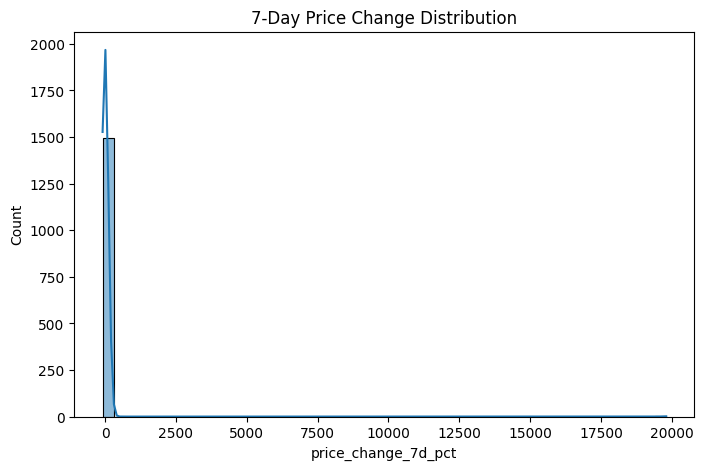

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["price_change_7d_pct"], bins=50, kde=True)
plt.title("7-Day Price Change Distribution")
plt.show()

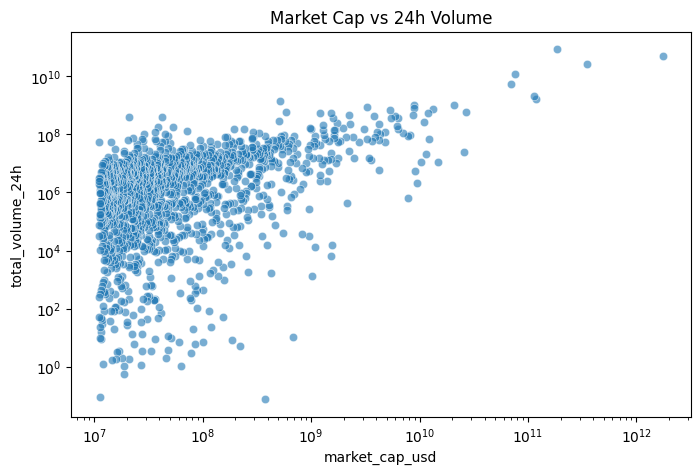

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="market_cap_usd",
    y="total_volume_24h",
    alpha=0.6
)
plt.xscale("log")
plt.yscale("log")
plt.title("Market Cap vs 24h Volume")
plt.show()

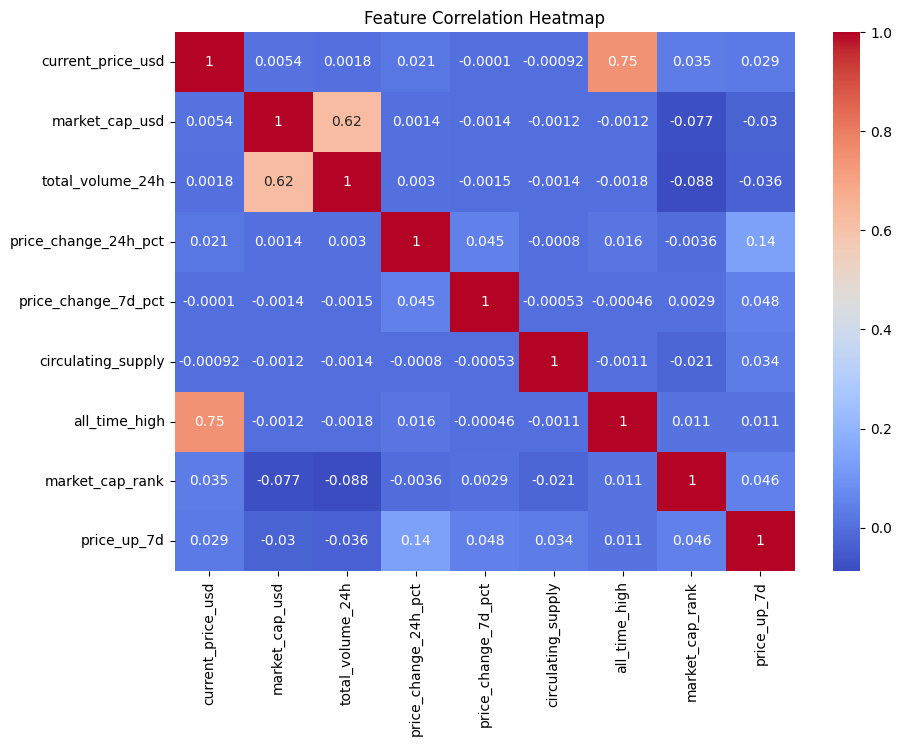

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
X = numeric_df.drop(columns=[
    "price_change_7d_pct",
    "price_up_7d"
])

y = numeric_df["price_up_7d"]

# Handle missing values
X = X.fillna(X.median())

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [15]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6933333333333334
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       191
           1       0.62      0.40      0.49       109

    accuracy                           0.69       300
   macro avg       0.67      0.63      0.63       300
weighted avg       0.68      0.69      0.67       300



In [16]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
3,price_change_24h_pct,0.277046
0,current_price_usd,0.143382
5,all_time_high,0.140333
2,total_volume_24h,0.127559
1,market_cap_usd,0.110188
6,market_cap_rank,0.107969
4,circulating_supply,0.093524


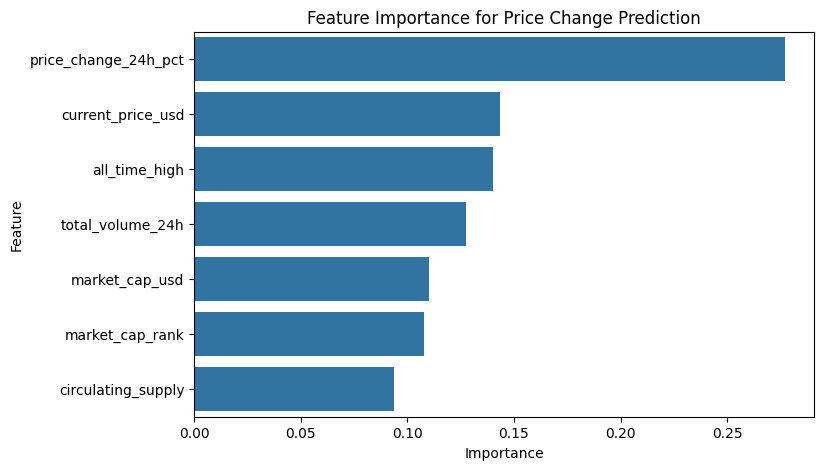

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=feature_importance,
    x="Importance",
    y="Feature"
)
plt.title("Feature Importance for Price Change Prediction")
plt.show()